# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr X vs Chr X p22

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 4

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_x': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p2

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_x': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-17L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_x\\191128-del(X)(p22)-18L.bmp',
 

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_x', 'chr_x_p22_cnv'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  4
chr_x
   Train: 
        191128-del(X)(p22)-10L.bmp
        191128-del(X)(p22)-12L.bmp
        191128-del(X)(p22)-13L.bmp
        191128-del(X)(p22)-14L.bmp
        191128-del(X)(p22)-15L.bmp
        191128-del(X)(p22)-16L.bmp
        191128-del(X)(p22)-19L.bmp
        191128-del(X)(p22)-1L.bmp
        191128-del(X)(p22)-20L.bmp
        191128-del(X)(p22)-21L.bmp
        191128-del(X)(p22)-22L.bmp
        191128-del(X)(p22)-2L.bmp
        191128-del(X)(p22)-3L.bmp
        191128-del(X)(p22)-4L.bmp
        191128-del(X)(p22)-6L.bmp
        191128-del(X)(p22)-7L.bmp
        191128-del(X)(p22)-8L.bmp
        192478-delXq21-10L.bmp
        192478-delXq21-12L.bmp
        192478-delXq21-13L.bmp
        192478-delXq21-15L.bmp
        192478-delXq21-16L.bmp
        192478-delXq21-17L.bmp
        192478-delXq21-18L.bmp
        192478-delXq21-1L.bmp
        192478-delXq21-20L.bmp
        192478-delXq21-21L.bmp
        192478-delXq21-22L.bmp
        192478-delXq21-23L.bmp
       

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [12]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [13]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [14]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [15]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [16]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [17]:
chromConvert = {
               'chr_x': 0, 
               'chr_x_p22_cnv': 1
               }

In [18]:
chromConvert_reverse = {
                0: 'chr_x', 
                1: 'chr_x_p22_cnv', 
               }

In [19]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [20]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [21]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [22]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [23]:
len(X_train)

180

In [24]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [25]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [26]:
model = Sequential()

In [27]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [28]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [29]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

In [30]:
start = time.time()

### 3.2.5. Compile the modal

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [32]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
3/3 [==============================] - 6s 2s/step - loss: 471.2620 - accuracy: 0.5889 - val_loss: 411.1355 - val_accuracy: 0.1395
Epoch 2/500
3/3 [==============================] - 0s 186ms/step - loss: 135.8459 - accuracy: 0.3889 - val_loss: 9.5827 - val_accuracy: 0.8605
Epoch 3/500
3/3 [==============================] - 0s 145ms/step - loss: 4.3097 - accuracy: 0.8389 - val_loss: 0.5044 - val_accuracy: 0.8605
Epoch 4/500
3/3 [==============================] - 0s 144ms/step - loss: 0.6990 - accuracy: 0.6500 - val_loss: 8.6063 - val_accuracy: 0.8605
Epoch 5/500
3/3 [==============================] - 0s 145ms/step - loss: 5.0963 - accuracy: 0.8500 - val_loss: 0.3927 - val_accuracy: 0.7907
Epoch 6/500
3/3 [==============================] - 0s 146ms/step - loss: 1.0746 - accuracy: 0.8444 - val_loss: 0.3167 - val_accuracy: 0.8605
Epoch 7/500
3/3 [==============================] - 0s 142ms/step - loss: 0.3593 - accuracy: 0.8556 - val_loss: 0.4390 - val_accuracy: 0.7674
Epoch 8/50

3/3 [==============================] - 0s 143ms/step - loss: 6.0288e-05 - accuracy: 1.0000 - val_loss: 0.9848 - val_accuracy: 0.8837
Epoch 59/500
3/3 [==============================] - 0s 140ms/step - loss: 5.4813e-05 - accuracy: 1.0000 - val_loss: 0.9871 - val_accuracy: 0.8837
Epoch 60/500
3/3 [==============================] - 0s 143ms/step - loss: 5.2040e-05 - accuracy: 1.0000 - val_loss: 0.9893 - val_accuracy: 0.8837
Epoch 61/500
3/3 [==============================] - 0s 134ms/step - loss: 4.7700e-05 - accuracy: 1.0000 - val_loss: 0.9910 - val_accuracy: 0.9070
Epoch 62/500
3/3 [==============================] - 0s 145ms/step - loss: 4.5128e-05 - accuracy: 1.0000 - val_loss: 0.9940 - val_accuracy: 0.9070
Epoch 63/500
3/3 [==============================] - 0s 133ms/step - loss: 4.1754e-05 - accuracy: 1.0000 - val_loss: 0.9960 - val_accuracy: 0.9070
Epoch 64/500
3/3 [==============================] - 0s 141ms/step - loss: 3.8684e-05 - accuracy: 1.0000 - val_loss: 0.9966 - val_accuracy

3/3 [==============================] - 0s 131ms/step - loss: 3.1428e-06 - accuracy: 1.0000 - val_loss: 1.0612 - val_accuracy: 0.9302
Epoch 115/500
3/3 [==============================] - 0s 145ms/step - loss: 3.0428e-06 - accuracy: 1.0000 - val_loss: 1.0617 - val_accuracy: 0.9302
Epoch 116/500
3/3 [==============================] - 0s 139ms/step - loss: 2.9184e-06 - accuracy: 1.0000 - val_loss: 1.0627 - val_accuracy: 0.9302
Epoch 117/500
3/3 [==============================] - 0s 132ms/step - loss: 2.8574e-06 - accuracy: 1.0000 - val_loss: 1.0638 - val_accuracy: 0.9302
Epoch 118/500
3/3 [==============================] - 0s 135ms/step - loss: 2.7575e-06 - accuracy: 1.0000 - val_loss: 1.0645 - val_accuracy: 0.9302
Epoch 119/500
3/3 [==============================] - 0s 133ms/step - loss: 2.7025e-06 - accuracy: 1.0000 - val_loss: 1.0652 - val_accuracy: 0.9302
Epoch 120/500
3/3 [==============================] - 0s 126ms/step - loss: 2.6429e-06 - accuracy: 1.0000 - val_loss: 1.0655 - val_ac

Epoch 170/500
3/3 [==============================] - 0s 141ms/step - loss: 8.7616e-07 - accuracy: 1.0000 - val_loss: 1.1032 - val_accuracy: 0.9302
Epoch 171/500
3/3 [==============================] - 0s 133ms/step - loss: 8.6292e-07 - accuracy: 1.0000 - val_loss: 1.1039 - val_accuracy: 0.9302
Epoch 172/500
3/3 [==============================] - 0s 129ms/step - loss: 8.5034e-07 - accuracy: 1.0000 - val_loss: 1.1045 - val_accuracy: 0.9302
Epoch 173/500
3/3 [==============================] - 0s 133ms/step - loss: 8.3511e-07 - accuracy: 1.0000 - val_loss: 1.1051 - val_accuracy: 0.9302
Epoch 174/500
3/3 [==============================] - 0s 135ms/step - loss: 8.2385e-07 - accuracy: 1.0000 - val_loss: 1.1056 - val_accuracy: 0.9302
Epoch 175/500
3/3 [==============================] - 0s 139ms/step - loss: 8.1126e-07 - accuracy: 1.0000 - val_loss: 1.1062 - val_accuracy: 0.9302
Epoch 176/500
3/3 [==============================] - 0s 137ms/step - loss: 7.9206e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 226/500
3/3 [==============================] - 0s 134ms/step - loss: 4.3776e-07 - accuracy: 1.0000 - val_loss: 1.1332 - val_accuracy: 0.9302
Epoch 227/500
3/3 [==============================] - 0s 139ms/step - loss: 4.3445e-07 - accuracy: 1.0000 - val_loss: 1.1336 - val_accuracy: 0.9302
Epoch 228/500
3/3 [==============================] - 0s 138ms/step - loss: 4.3180e-07 - accuracy: 1.0000 - val_loss: 1.1341 - val_accuracy: 0.9302
Epoch 229/500
3/3 [==============================] - 0s 137ms/step - loss: 4.2451e-07 - accuracy: 1.0000 - val_loss: 1.1346 - val_accuracy: 0.9302
Epoch 230/500
3/3 [==============================] - 0s 139ms/step - loss: 4.1988e-07 - accuracy: 1.0000 - val_loss: 1.1351 - val_accuracy: 0.9302
Epoch 231/500
3/3 [==============================] - 0s 142ms/step - loss: 4.1590e-07 - accuracy: 1.0000 - val_loss: 1.1356 - val_accuracy: 0.9302
Epoch 232/500
3/3 [==============================] - 0s 146ms/step - loss: 4.1325e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 282/500
3/3 [==============================] - 0s 140ms/step - loss: 2.6756e-07 - accuracy: 1.0000 - val_loss: 1.1559 - val_accuracy: 0.9302
Epoch 283/500
3/3 [==============================] - 0s 139ms/step - loss: 2.6557e-07 - accuracy: 1.0000 - val_loss: 1.1563 - val_accuracy: 0.9302
Epoch 284/500
3/3 [==============================] - 0s 136ms/step - loss: 2.6292e-07 - accuracy: 1.0000 - val_loss: 1.1566 - val_accuracy: 0.9302
Epoch 285/500
3/3 [==============================] - 0s 140ms/step - loss: 2.6093e-07 - accuracy: 1.0000 - val_loss: 1.1570 - val_accuracy: 0.9302
Epoch 286/500
3/3 [==============================] - 0s 140ms/step - loss: 2.6027e-07 - accuracy: 1.0000 - val_loss: 1.1574 - val_accuracy: 0.9302
Epoch 287/500
3/3 [==============================] - 0s 140ms/step - loss: 2.5762e-07 - accuracy: 1.0000 - val_loss: 1.1577 - val_accuracy: 0.9302
Epoch 288/500
3/3 [==============================] - 0s 142ms/step - loss: 2.5497e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 338/500
3/3 [==============================] - 0s 137ms/step - loss: 1.7616e-07 - accuracy: 1.0000 - val_loss: 1.1753 - val_accuracy: 0.9302
Epoch 339/500
3/3 [==============================] - 0s 143ms/step - loss: 1.7550e-07 - accuracy: 1.0000 - val_loss: 1.1756 - val_accuracy: 0.9302
Epoch 340/500
3/3 [==============================] - 0s 144ms/step - loss: 1.7418e-07 - accuracy: 1.0000 - val_loss: 1.1760 - val_accuracy: 0.9302
Epoch 341/500
3/3 [==============================] - 0s 133ms/step - loss: 1.7285e-07 - accuracy: 1.0000 - val_loss: 1.1763 - val_accuracy: 0.9302
Epoch 342/500
3/3 [==============================] - 0s 132ms/step - loss: 1.7285e-07 - accuracy: 1.0000 - val_loss: 1.1767 - val_accuracy: 0.9302
Epoch 343/500
3/3 [==============================] - 0s 140ms/step - loss: 1.7153e-07 - accuracy: 1.0000 - val_loss: 1.1769 - val_accuracy: 0.9302
Epoch 344/500
3/3 [==============================] - 0s 169ms/step - loss: 1.7087e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 394/500
3/3 [==============================] - 0s 135ms/step - loss: 1.2384e-07 - accuracy: 1.0000 - val_loss: 1.1920 - val_accuracy: 0.9302
Epoch 395/500
3/3 [==============================] - 0s 128ms/step - loss: 1.2318e-07 - accuracy: 1.0000 - val_loss: 1.1923 - val_accuracy: 0.9302
Epoch 396/500
3/3 [==============================] - 0s 134ms/step - loss: 1.2318e-07 - accuracy: 1.0000 - val_loss: 1.1925 - val_accuracy: 0.9302
Epoch 397/500
3/3 [==============================] - 0s 133ms/step - loss: 1.2252e-07 - accuracy: 1.0000 - val_loss: 1.1928 - val_accuracy: 0.9302
Epoch 398/500
3/3 [==============================] - 0s 138ms/step - loss: 1.2186e-07 - accuracy: 1.0000 - val_loss: 1.1930 - val_accuracy: 0.9302
Epoch 399/500
3/3 [==============================] - 0s 139ms/step - loss: 1.2120e-07 - accuracy: 1.0000 - val_loss: 1.1932 - val_accuracy: 0.9302
Epoch 400/500
3/3 [==============================] - 0s 139ms/step - loss: 1.2053e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 450/500
3/3 [==============================] - 0s 134ms/step - loss: 9.3380e-08 - accuracy: 1.0000 - val_loss: 1.2056 - val_accuracy: 0.9302
Epoch 451/500
3/3 [==============================] - 0s 144ms/step - loss: 9.2718e-08 - accuracy: 1.0000 - val_loss: 1.2059 - val_accuracy: 0.9302
Epoch 452/500
3/3 [==============================] - 0s 137ms/step - loss: 9.2718e-08 - accuracy: 1.0000 - val_loss: 1.2061 - val_accuracy: 0.9302
Epoch 453/500
3/3 [==============================] - 0s 138ms/step - loss: 9.2056e-08 - accuracy: 1.0000 - val_loss: 1.2064 - val_accuracy: 0.9302
Epoch 454/500
3/3 [==============================] - 0s 139ms/step - loss: 9.2056e-08 - accuracy: 1.0000 - val_loss: 1.2066 - val_accuracy: 0.9302
Epoch 455/500
3/3 [==============================] - 0s 139ms/step - loss: 9.2056e-08 - accuracy: 1.0000 - val_loss: 1.2068 - val_accuracy: 0.9302
Epoch 456/500
3/3 [==============================] - 0s 143ms/step - loss: 9.1394e-08 - accuracy: 1.0000 - val_loss: 1

### 3.2.7 Summary

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 298, 298, 32)      320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 149, 149, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 147, 147, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 73, 73, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 71, 71, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 35, 35, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 78400)             0

### 3.2.8. Tensorboard Display

In [34]:
%tensorboard --logdir logs/fit

Reusing TensorBoard on port 6006 (pid 4700), started 21 days, 5:19:14 ago. (Use '!kill 4700' to kill it.)

In [35]:
end = time.time()
print('Time elapsed: ', (end - start)/60, ' minutes.')

Time elapsed:  39.679051351547244  minutes.


## 3.8 Save the Model

In [36]:
model.save('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

INFO:tensorflow:Assets written to: saved_model/model_Chr_X_cnn_iteration_4\assets


## 3.9 Load the Model

In [37]:
model_reload = keras.models.load_model('saved_model/model_Chr_X_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [38]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.930


In [39]:
len(X_test)

43

In [40]:
y_predict = model_reload.predict(X_test)

In [41]:
len(y_predict)

43

In [42]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [43]:
len(y_predict_filtered)

43

In [44]:
label = ['chr_x', 'chr_x_p22_cnv']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [45]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [46]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [47]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [48]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [49]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [50]:
y_predict

array([[9.8055631e-01, 9.0175094e-03],
       [1.0000000e+00, 4.2603096e-13],
       [5.0539410e-01, 2.9627806e-01],
       [9.9999762e-01, 1.3578323e-06],
       [9.9482995e-01, 2.1758594e-03],
       [8.7386078e-01, 6.6486791e-02],
       [3.4530032e-03, 9.9630225e-01],
       [9.8680079e-01, 9.7715901e-03],
       [1.0000000e+00, 5.3500949e-34],
       [1.0000000e+00, 1.5550482e-28],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.0701555e-20],
       [1.0000000e+00, 7.3433277e-14],
       [1.0000000e+00, 5.6218324e-23],
       [1.0000000e+00, 3.0818827e-17],
       [1.0000000e+00, 3.6489343e-27],
       [9.9471080e-01, 2.3251908e-02],
       [1.0000000e+00, 7.7874229e-10],
       [1.0000000e+00, 2.4517302e-10],
       [1.0000000e+00, 5.4575990e-17],
       [9.9840051e-01, 4.3868059e-03],
       [1.0000000e+00, 6.5357613e-15],
       [1.0000000e+00, 7.9789414e-10],
       [1.0000000e+00, 5.5458925e-13],
       [9.9999952e-01, 5.8915106e-07],
       [8.2912129e-01, 1.

### 3.10.2. Classification Report

In [51]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.95      0.97      0.96        37
chr_x_p22_cnv       0.80      0.67      0.73         6

    micro avg       0.93      0.93      0.93        43
    macro avg       0.87      0.82      0.84        43
 weighted avg       0.93      0.93      0.93        43



### 3.10.3. Confusion Matrix

In [52]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_X_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

chr_x  chr_x_p22_cnv
chr_x             36              1
chr_x_p22_cnv      2              4

#### Heat Map

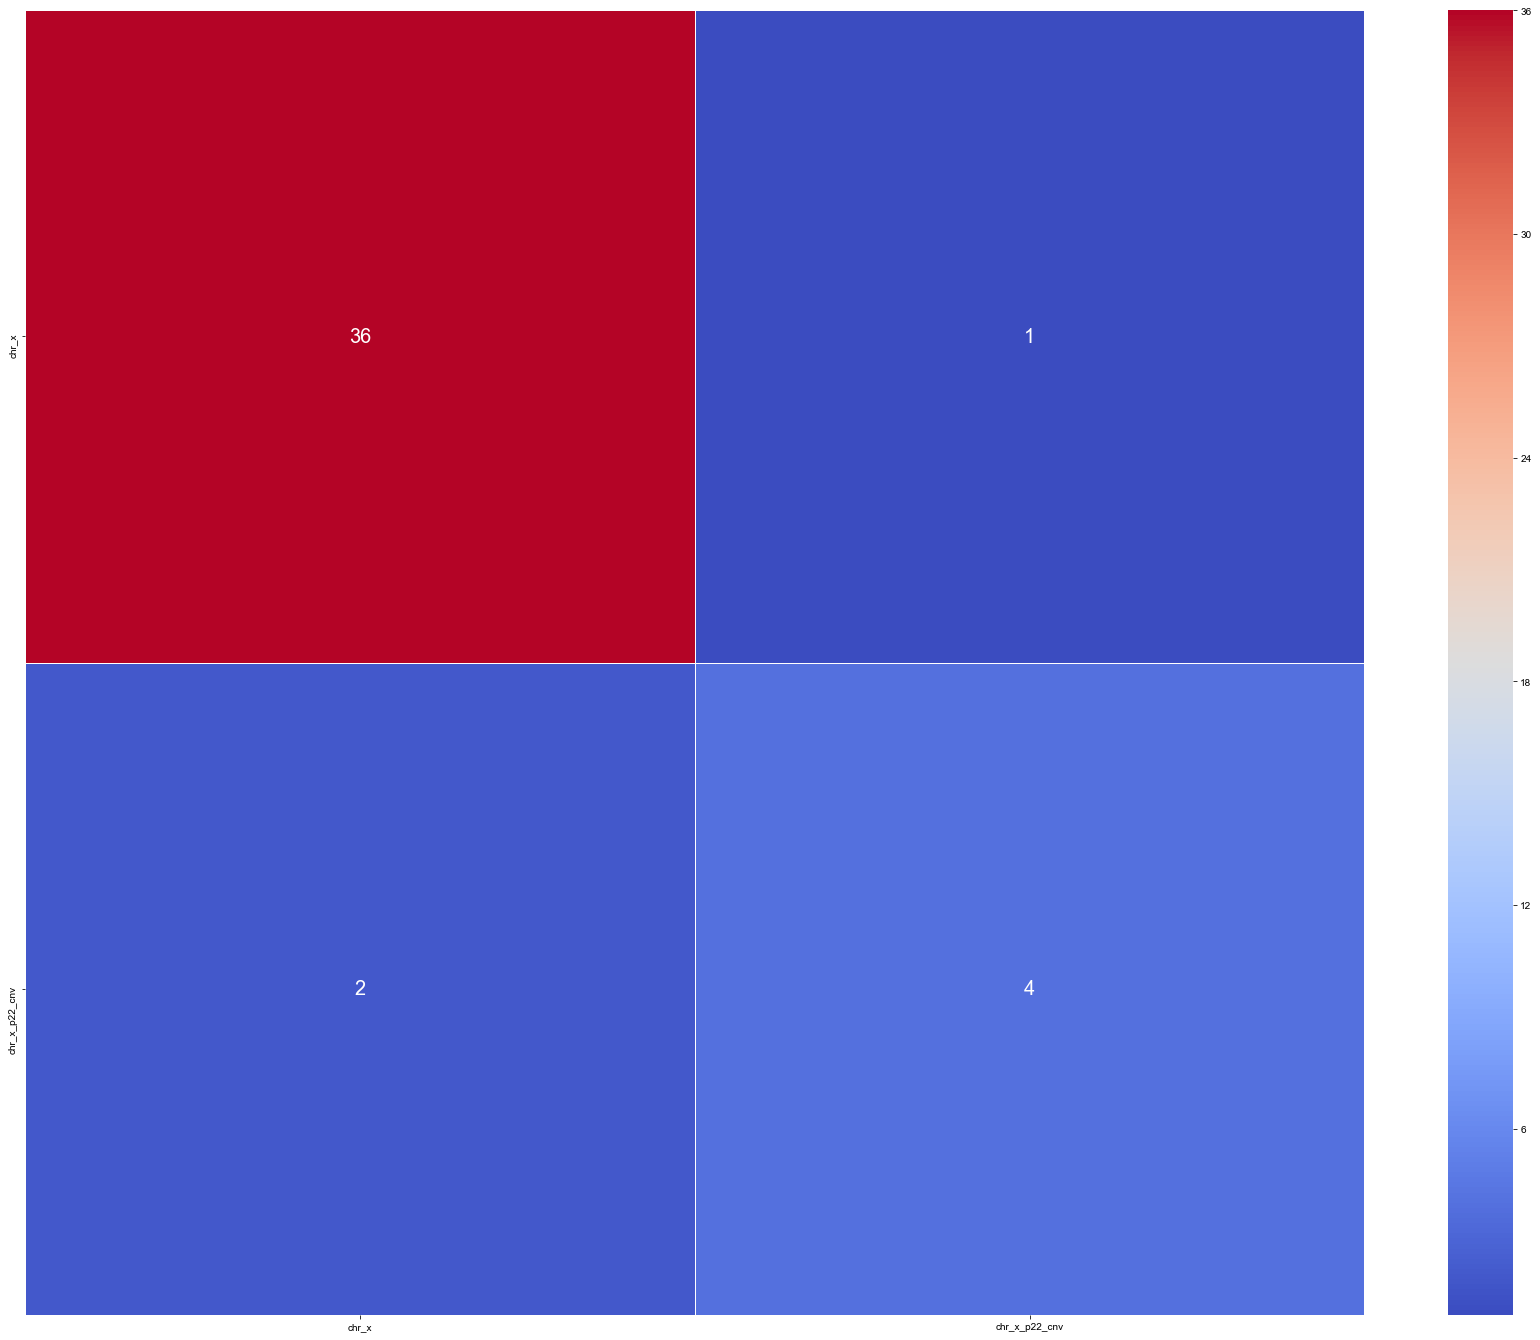

In [53]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [54]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_X_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [55]:
y_predict

array([[9.8055631e-01, 9.0175094e-03],
       [1.0000000e+00, 4.2603096e-13],
       [5.0539410e-01, 2.9627806e-01],
       [9.9999762e-01, 1.3578323e-06],
       [9.9482995e-01, 2.1758594e-03],
       [8.7386078e-01, 6.6486791e-02],
       [3.4530032e-03, 9.9630225e-01],
       [9.8680079e-01, 9.7715901e-03],
       [1.0000000e+00, 5.3500949e-34],
       [1.0000000e+00, 1.5550482e-28],
       [1.0000000e+00, 0.0000000e+00],
       [1.0000000e+00, 3.0701555e-20],
       [1.0000000e+00, 7.3433277e-14],
       [1.0000000e+00, 5.6218324e-23],
       [1.0000000e+00, 3.0818827e-17],
       [1.0000000e+00, 3.6489343e-27],
       [9.9471080e-01, 2.3251908e-02],
       [1.0000000e+00, 7.7874229e-10],
       [1.0000000e+00, 2.4517302e-10],
       [1.0000000e+00, 5.4575990e-17],
       [9.9840051e-01, 4.3868059e-03],
       [1.0000000e+00, 6.5357613e-15],
       [1.0000000e+00, 7.9789414e-10],
       [1.0000000e+00, 5.5458925e-13],
       [9.9999952e-01, 5.8915106e-07],
       [8.2912129e-01, 1.

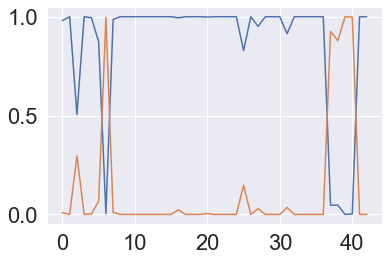

In [56]:
plt.plot(y_predict)

In [57]:
y_predict_1D = y_predict[:,0]

In [58]:
y_predict_1D_processed = 1- y_predict_1D

In [59]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [60]:
auc_rf

0.8918918918918918

In [61]:
x = y = np.arange(0,1.1,0.1)

In [62]:
x

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

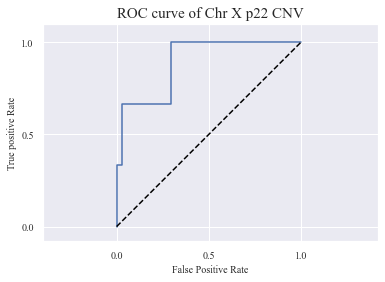

In [63]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of Chr X p22 CNV', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_X_p22_CNV_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [64]:
auc_value = auc(fpr, tpr)

In [65]:
print('AUC is ', auc_value)

AUC is  0.8918918918918918


# Results

In [66]:
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.930


In [67]:
print(performanceReport)

               precision    recall  f1-score   support

        chr_x       0.95      0.97      0.96        37
chr_x_p22_cnv       0.80      0.67      0.73         6

    micro avg       0.93      0.93      0.93        43
    macro avg       0.87      0.82      0.84        43
 weighted avg       0.93      0.93      0.93        43



In [68]:
type(performanceReport)

str

In [69]:
confusion

chr_x  chr_x_p22_cnv
chr_x             36              1
chr_x_p22_cnv      2              4

In [70]:
print('AUC is ', auc_value)

AUC is  0.8918918918918918


## Export to a text file

In [71]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()